In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
df = pd.read_csv('ExM7Real.csv')

In [3]:
df.head(10)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0
5,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0
6,0,27.482192,4.024658,1,0,1,0,2.0,False,0,...,1,1,0,0,0,1,0,0,0,0
7,0,27.482192,4.024658,1,0,1,0,2.0,False,0,...,1,1,0,0,0,1,0,0,0,0
8,1,30.049315,4.438356,1,0,0,0,2.0,False,0,...,1,0,0,1,0,1,0,0,0,0
9,1,30.049315,4.438356,1,0,0,0,2.0,False,0,...,1,0,0,1,0,1,0,0,0,0


In [4]:
X = df.drop('mau', axis=1)
y = df['mau']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
#1
arvore_decisao = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


arvore_decisao.fit(X_train, y_train)  


y_pred = arvore_decisao.predict(X_test)  


In [7]:
#2
previsoes_treinamento = arvore_decisao.predict(X_train)


acuracia_treinamento = accuracy_score(y_train, previsoes_treinamento)
print(f'{acuracia_treinamento:.4f}')

0.9761


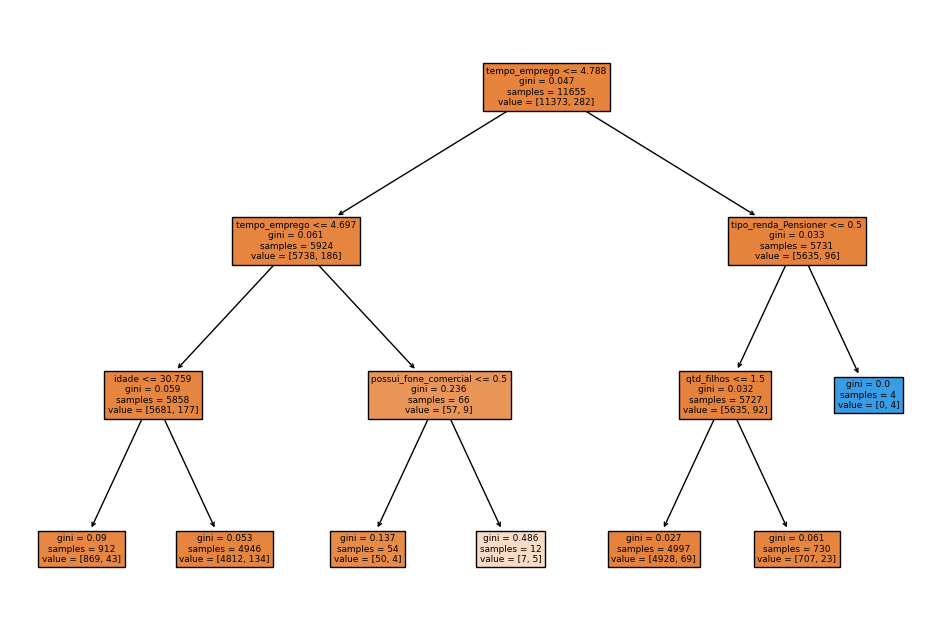

In [8]:
#3
plt.figure(figsize=(12, 8))
plot_tree(arvore_decisao, feature_names=X_train.columns.tolist(), class_names=None, filled=True)
plt.show()

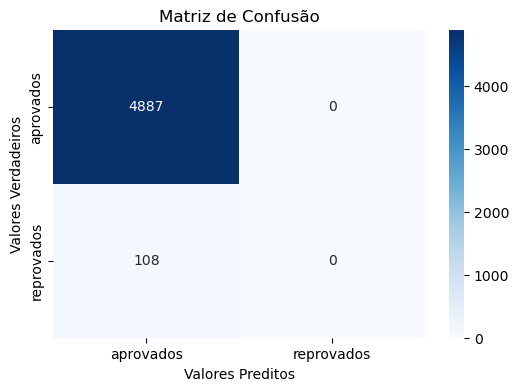

In [9]:
#4
y_pred = arvore_decisao.predict(X_test)


labels = ['aprovados', 'reprovados']


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [10]:
#5

previsoes_treinamento = arvore_decisao.predict(X_train)

acuracia_treinamento = accuracy_score(y_train, previsoes_treinamento)
print(f'{acuracia_treinamento:.4f}')

0.9761


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
#1
y_pred_test = arvore_decisao.predict(X_test)

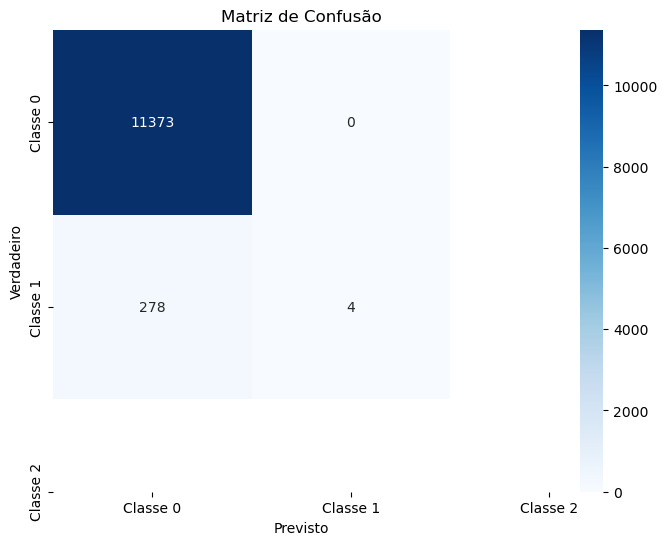

In [12]:
#2
y_pred = arvore_decisao.predict(X_train)


conf_matrix = confusion_matrix(y_train, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], 
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [13]:
#3
y_pred_train = arvore_decisao.predict(X_train)
y_pred_test = arvore_decisao.predict(X_train)


accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treinamento: {accuracy_train:.4f}")


accuracy_test = accuracy_score(y_train, y_pred_test)
print(f"Acurácia no conjunto de teste: {accuracy_test:.4f}")

Acurácia no conjunto de treinamento: 0.9761
Acurácia no conjunto de teste: 0.9761


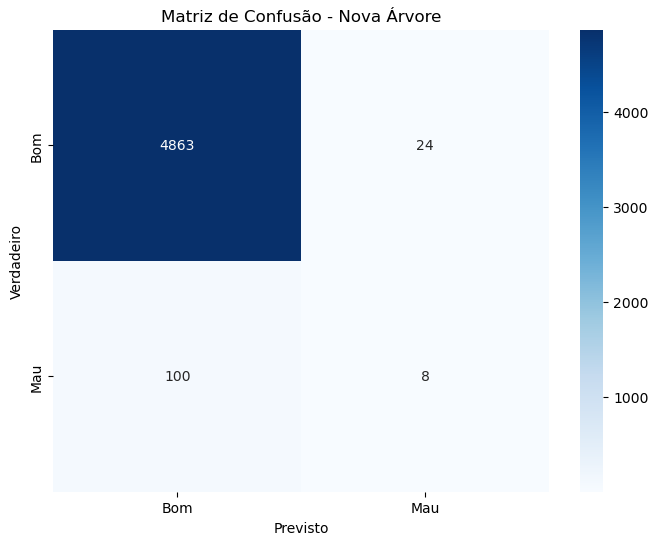

A proporção de proponentes classificados como 'maus': 0.0064


In [14]:
#4
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)


nova_arvore.fit(X_train, y_train)


y_pred_nova_arvore = nova_arvore.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred_nova_arvore)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Bom', 'Mau'],
            yticklabels=['Bom', 'Mau'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Nova Árvore')
plt.show()

y_pred_nova_arvore_numeric = y_pred_nova_arvore.astype(int)


proporcao_maus = y_pred_nova_arvore_numeric.sum() / len(y_pred_nova_arvore_numeric)
print(f"A proporção de proponentes classificados como 'maus': {proporcao_maus:.4f}")

In [15]:
#5
acuracia_todos_bons = (y_train == 'Bom').sum() / len(y_train)

print(f"Acurácia ao classificar todos os contratos como 'bons': {acuracia_todos_bons:.4f}")


Acurácia ao classificar todos os contratos como 'bons': 0.0000
